In [1]:
# Import required packages

# Import pandas in order to access NCEI data through its URL
import pandas as pd

# Import holoviews extension to pandas to make an interactive plot later
import holoviews as hv
import hvplot.pandas

In [2]:
# Create variable name for URL
## Create URL by generating API endpoint using NCEI [API documentation]
## (https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation)
### Call variable by name at end of cell
st_petersburg_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=TAVG'
    '&stations=RSM00026063'
    '&units=standard'
    '&startDate=1881-01-01'
    '&endDate=2023-12-31')
st_petersburg_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TAVG&stations=RSM00026063&units=standard&startDate=1881-01-01&endDate=2023-12-31'

In [3]:
# Create expressive variable name for a dataframe (a type of Python object)
## Import data into Python using module 'pd' and function 'read.csv()'
## from NCEI API (AKA: download your data including parameters)
### Call dataframe variable at end of cell
sp_climate_df = pd.read_csv(
    st_petersburg_url,
    index_col="DATE",
    parse_dates=True,
    na_values=['NaN'])
sp_climate_df

,STATION,TAVG
DATE,,
1881-01-01,RSM00026063,32
1881-01-02,RSM00026063,30
1881-01-03,RSM00026063,34
1881-01-04,RSM00026063,35
1881-01-05,RSM00026063,21
...,...,...
2023-12-27,RSM00026063,24
2023-12-28,RSM00026063,26
2023-12-29,RSM00026063,27


In [4]:
# Check that the data was imported into a pandas DataFrame (object)
sp_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52226 entries, 1881-01-01 to 2023-12-31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STATION  52226 non-null  object
 1   TAVG     52226 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [5]:
# Clean up data - get rid of unwanted STATION column by selecting only 
# the columns I want which is [[TAVG]]
## Call DataFrame by name at end of cell
sp_climate_df = sp_climate_df[['TAVG']]
sp_climate_df

,TAVG
DATE,
1881-01-01,32
1881-01-02,30
1881-01-03,34
1881-01-04,35
1881-01-05,21
...,...
2023-12-27,24
2023-12-28,26
2023-12-29,27


In [6]:
# Store the DataFrame created to use in other Notebooks
%store sp_climate_df

Stored 'sp_climate_df' (DataFrame)


In [11]:
# Label unit type by using the method .rename and the function (columns=) 
sp_climate_df_units = sp_climate_df.rename(columns={
    'TAVG': 'TAVG_F'
})

sp_climate_df_units

,TAVG_F
DATE,
1881-01-01,32
1881-01-02,30
1881-01-03,34
1881-01-04,35
1881-01-05,21
...,...
2023-12-27,24
2023-12-28,26
2023-12-29,27


<Axes: title={'center': 'St.Petersbug, Russia - Annual Average Temperature'}, xlabel='Year', ylabel='Temperature ($^\\circ$F)'>

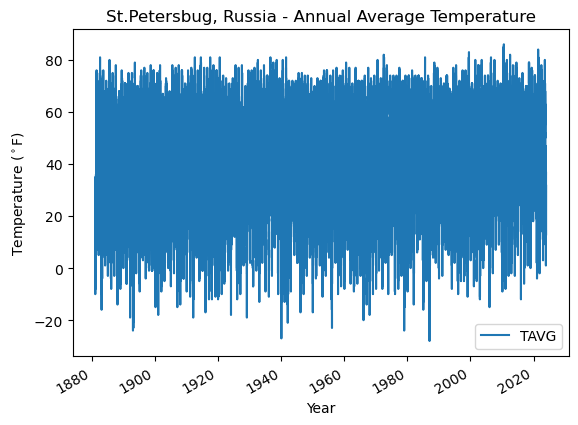

In [8]:
# Try plotting DataFrame to make sure what you are seeing makes sense
sp_climate_df.plot(
   y='TAVG',
   title='St.Petersbug, Russia - Annual Average Temperature',
   xlabel='Year',
   ylabel='Temperature ($^\circ$F)'
)  

In [12]:
# Create an expressive new variable name for annual temp
## Resample (a type ofmethod) data, setting the frequency of the final 
## data to year start ('YS') using .mean (another type of method)
ann_sp_climate_df = sp_climate_df.resample('YS').mean()
ann_sp_climate_df

,TAVG
DATE,
1881-01-01,37.460274
1882-01-01,41.443836
1883-01-01,39.750685
1884-01-01,38.715847
1885-01-01,39.813699
...,...
2019-01-01,44.276712
2020-01-01,45.926230
2021-01-01,43.055249


<Axes: title={'center': 'St.Petersbug, Russia - Annual Average Temperature'}, xlabel='Year', ylabel='Temperature ($^\\circ$F)'>

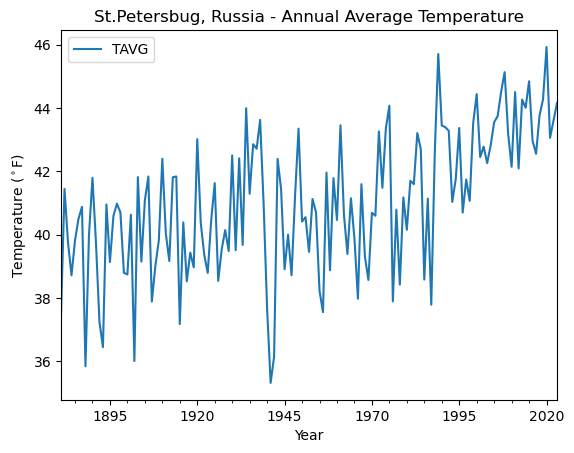

In [13]:
 # Plot this new variable
ann_sp_climate_df.plot(
    y='TAVG',
    title='St.Petersbug, Russia - Annual Average Temperature',
    xlabel='Year',
    ylabel='Temperature ($^\circ$F)'
)

In [15]:
# Try creating an interavtive plot 
ann_sp_temp_plot = ann_sp_climate_df.hvplot(
    y='TAVG',
    title='Annual Temperature in St.Petersburg, Russia Over Time',
    xlabel='Date',
    ylabel='Temperature ($^\circ$F)')
ann_sp_temp_plot

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [DATE]   (TAVG)

In [16]:
# Save my work
hv.save(ann_sp_temp_plot, 'st_petersburg_ann_temp_plot.html')

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


In [17]:
%store ann_sp_climate_df

Stored 'ann_sp_climate_df' (DataFrame)


In [18]:
# Import packages needed to calculate and plot an OLS Linear trend line.
## Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression